In [2]:
import pandas as pd
import numpy as np

In [4]:
medical_df = pd.read_csv(r"C:\Users\Kshama\OneDrive\Documents\Desktop\Machinelearning2026_Kshama\data\medical (2).csv")
print(medical_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
# Check missing values before processing
print("Missing values per column before handling:")
print(medical_df.isnull().sum())

Missing values per column before handling:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# Fill numeric columns with mean
for col in medical_df.select_dtypes(include=np.number).columns:
    medical_df[col].fillna(medical_df[col].mean(), inplace=True)

In [10]:
# Step 8: Handle missing values

# Fill numeric columns with mean
for col in medical_df.select_dtypes(include='number').columns:
    medical_df[col].fillna(medical_df[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in medical_df.select_dtypes(include='object').columns:
    medical_df[col].fillna(medical_df[col].mode()[0], inplace=True)

# Verify
print("Missing values after handling:")
print(medical_df.isnull().sum())

Missing values after handling:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
# Step 9: Convert categorical to numeric
if 'Gender' in medical_df.columns:
    medical_df['Gender'] = medical_df['Gender'].map({'Male':0, 'Female':1})

In [14]:
# Step 10: Normalize all numeric columns (0-1 range)
for col in medical_df.select_dtypes(include='number').columns:
    medical_df[col] = (medical_df[col] - medical_df[col].min()) / (medical_df[col].max() - medical_df[col].min())

In [16]:
# Step 11: Save processed dataset
medical_df.to_csv(r"C:\Users\Kshama\OneDrive\Documents\Desktop\Machinelearning2026_Kshama\data\medical_processed.csv", index=False)
print("Processed dataset saved as 'medical_processed.csv'")

Processed dataset saved as 'medical_processed.csv'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Better style for plots
sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [8]:
import matplotlib.pyplot as plt
# Basic info about dataset

medical_df.info()

# Summary statistics
medical_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


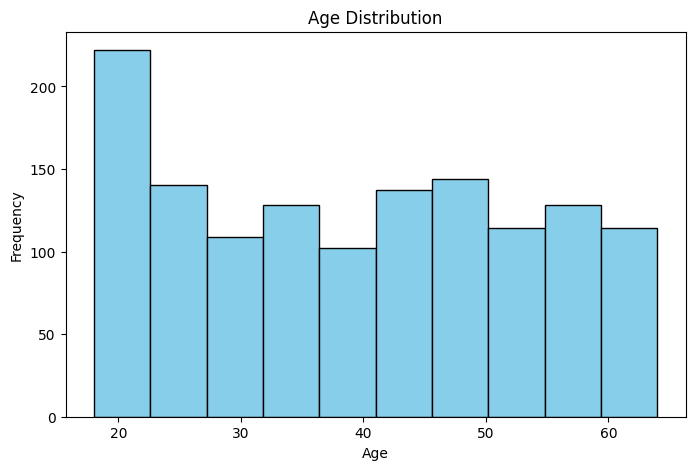

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(medical_df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Kshama\AppData\Local\Temp\ipykernel_16596\3953166335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=medical_df, x='age', palette='Set2')


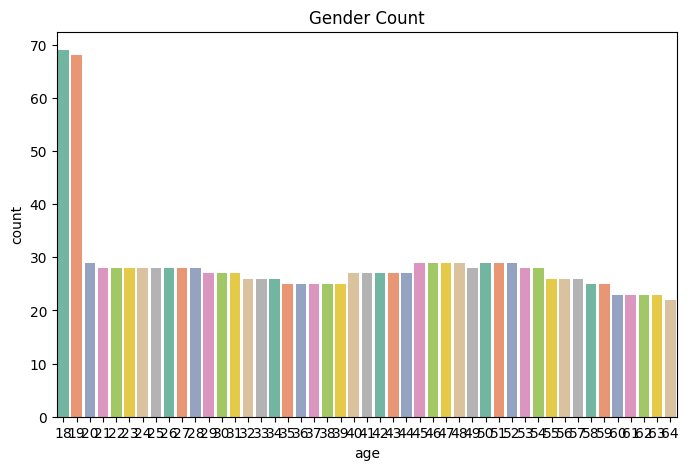

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=medical_df, x='age', palette='Set2')
plt.title('Gender Count')
plt.show()

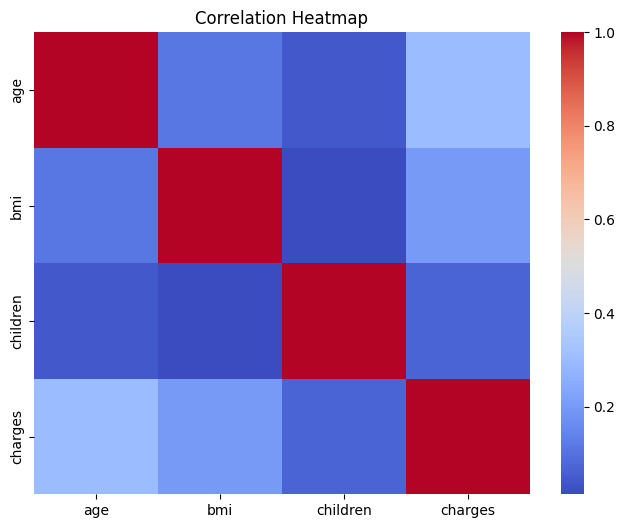

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
# Select only numeric columns for correlation to avoid string conversion errors
numeric_df = medical_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()